In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #visualize
plt.style.use("seaborn-whitegrid")

import seaborn as sns #visualize

from collections import Counter

import warnings # don't show warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [163]:
data_fifa = pd.read_csv("players.csv")

In [164]:
data_fifa.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

In [165]:
data_fifa.columns[data_fifa.isnull().any()] 

Index(['int_team_id', 'str_player_speciality', 'str_trait'], dtype='object')

In [166]:
# Rename the columns of df2_melted: df2_tidy
data_fifa = data_fifa.rename(columns = {'str_player_name': 'PlayerName', 'str_positions': 'Positions',
                                       'dt_date_of_birth': 'D.O.B', 'int_height': 'PlayerHeight',
                                       'int_weight': 'PlayerWeight', 'int_overall_rating': 'OverallRating',
                                       'int_potential_rating': 'PotentialRating', 'str_best_position': 'BestPositions',
                                       'int_best_overall_rating': 'BestOverallRating', 'int_value': 'PlayerValue',
                                       'int_wage': 'Wage', 'str_nationality': 'Nationality',
                                       'int_crossing': 'Crossing', 'int_finishing': 'FinishingAccuracy',
                                       'int_heading_accuracy': 'HeadingAccuracy', 'int_short_passing': 'ShortPassing',
                                       'int_volleys': 'Volleys', 'int_defensive_awareness': 'DefensiveAwareness',
                                       'int_standing_tackle': 'StandingTackle', 'int_sliding_tackle': 'SlidingTackle',
                                       'int_diving': 'Diving', 'int_handling': 'Handling',
                                       'int_kicking': 'Kicking', 'int_gk_positioning': 'GkPositioning',
                                       'int_reflexes': 'Reflexes', 'int_aggression': 'Aggression',
                                       'int_interceptions': 'Interceptions', 'int_positioning': 'Positioning',
                                       'int_vision': 'Vision', 'int_penalties': 'Penalties',
                                       'int_composure': 'Composure', 'int_acceleration': 'Acceleration',
                                       'int_sprint_speed': 'SprintSpeed', 'int_agility': 'Agility',
                                       'int_reactions': 'Reactions', 'int_balance': 'Balance',
                                       'int_shot_power': 'ShotPower', 'int_jumping': 'JumpingPower',
                                       'int_stamina': 'Stamina', 'int_strength': 'Strength',
                                       'int_long_shots': 'LongShots', 'str_preferred_foot': 'PreferredFoot',
                                        'int_weak_foot': 'WeakFoot', 'int_skill_moves': 'SkillMoves',
                                       'int_international_reputations': 'InternationalReputations', 'str_work_rate': 'WorkRate',
                                       'str_body_type': 'BodyType', 'int_dribbling': 'Dribbling',
                                       'int_curve': 'Curve', 'int_fk_accuracy': 'FkAccuracy',
                                       'int_long_passing': 'LongPassing', 'int_ball_control': 'BallControl'}, inplace = False)

In [167]:
# Rename the columns of df2_melted: df2_tidy
data_fifa.sample(1)

,int_player_id,PlayerName,Positions,D.O.B,PlayerHeight,PlayerWeight,OverallRating,PotentialRating,BestPositions,BestOverallRating,...,InternationalReputations,WorkRate,BodyType,Dribbling,Curve,FkAccuracy,LongPassing,BallControl,str_player_speciality,str_trait
7105,7106,Josh Harrop,"CAM, LM",12/15/1995,175,70,68,73,CAM,70,...,1,Medium/ Medium,Lean (170-185),70,74,75,61,71,NaN,NaN


# Covert Datetime(DOB) Column to Numerical Data



In [168]:
data_fifa['D.O.B'] = pd.to_datetime(data_fifa['D.O.B'])
data_fifa['year']= data_fifa['D.O.B'].dt.year
data_fifa['month']= data_fifa['D.O.B'].dt.month


In [169]:
#Subtract 2021 from DOB to get Age
today = pd.to_datetime('2021-03-10')
data_fifa['age'] = today.year - data_fifa['D.O.B'].dt.year

In [170]:
columns = ['int_team_id', 'str_player_speciality', 'str_trait','int_player_id','D.O.B','year']
data_fifa = data_fifa.drop(columns, axis=1, inplace=False )
data_fifa.sample(1)

,PlayerName,Positions,PlayerHeight,PlayerWeight,OverallRating,PotentialRating,BestPositions,BestOverallRating,PlayerValue,Wage,...,InternationalReputations,WorkRate,BodyType,Dribbling,Curve,FkAccuracy,LongPassing,BallControl,month,age
116,Saúl Ñíguez Esclápez,"CM, LM, LB",184,75,84,87,CM,86,55500000,78000,...,3,High/ High,Lean (170-185),81,73,60,83,85,11,27


In [171]:
data_fifa.shape

(19002, 53)

In [172]:
data_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlayerName                19002 non-null  object
 1   Positions                 19002 non-null  object
 2   PlayerHeight              19002 non-null  int64 
 3   PlayerWeight              19002 non-null  int64 
 4   OverallRating             19002 non-null  int64 
 5   PotentialRating           19002 non-null  int64 
 6   BestPositions             19002 non-null  object
 7   BestOverallRating         19002 non-null  int64 
 8   PlayerValue               19002 non-null  int64 
 9   Wage                      19002 non-null  int64 
 10  Nationality               19002 non-null  object
 11  Crossing                  19002 non-null  int64 
 12  FinishingAccuracy         19002 non-null  int64 
 13  HeadingAccuracy           19002 non-null  int64 
 14  ShortPassing          

In [173]:
data_fifa.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

,count,mean,std,min,25%,50%,75%,max
PlayerHeight,19002.000000,181.225660,6.847472,155.000000,176.000000,181.000000,186.000000,206.000000
PlayerWeight,19002.000000,75.046311,7.078378,50.000000,70.000000,75.000000,80.000000,110.000000
OverallRating,19002.000000,65.754868,6.948835,47.000000,61.000000,66.000000,70.000000,93.000000
PotentialRating,19002.000000,71.148932,6.115352,48.000000,67.000000,71.000000,75.000000,95.000000
BestOverallRating,19002.000000,66.784286,6.733926,48.000000,62.000000,67.000000,71.000000,93.000000
PlayerValue,19002.000000,2891449.005368,7733189.305884,0.000000,475000.000000,950000.000000,2000000.000000,185500000.000000
Wage,19002.000000,9113.167035,19735.324238,0.000000,1000.000000,3000.000000,8000.000000,560000.000000
Crossing,19002.000000,49.690454,18.141514,6.000000,38.000000,54.000000,63.000000,94.000000
FinishingAccuracy,19002.000000,45.877329,19.580879,3.000000,30.000000,50.000000,62.000000,95.000000
HeadingAccuracy,19002.000000,51.970056,17.323647,5.000000,44.000000,55.000000,64.000000,93.000000


In [174]:
data_fifa.nunique()

PlayerName                  18914
Positions                     642
PlayerHeight                   50
PlayerWeight                   56
OverallRating                  47
PotentialRating                46
BestPositions                  15
BestOverallRating              46
PlayerValue                   256
Wage                          133
Nationality                   165
Crossing                       89
FinishingAccuracy              93
HeadingAccuracy                89
ShortPassing                   86
Volleys                        88
DefensiveAwareness             92
StandingTackle                 87
SlidingTackle                  85
Diving                         69
Handling                       70
Kicking                        79
GkPositioning                  75
Reflexes                       70
Aggression                     88
Interceptions                  89
Positioning                    94
Vision                         86
Penalties                      87
Composure     

Text(0.5, 1.0, 'Multi-Collinearity of FIFA 2021 Attribute')

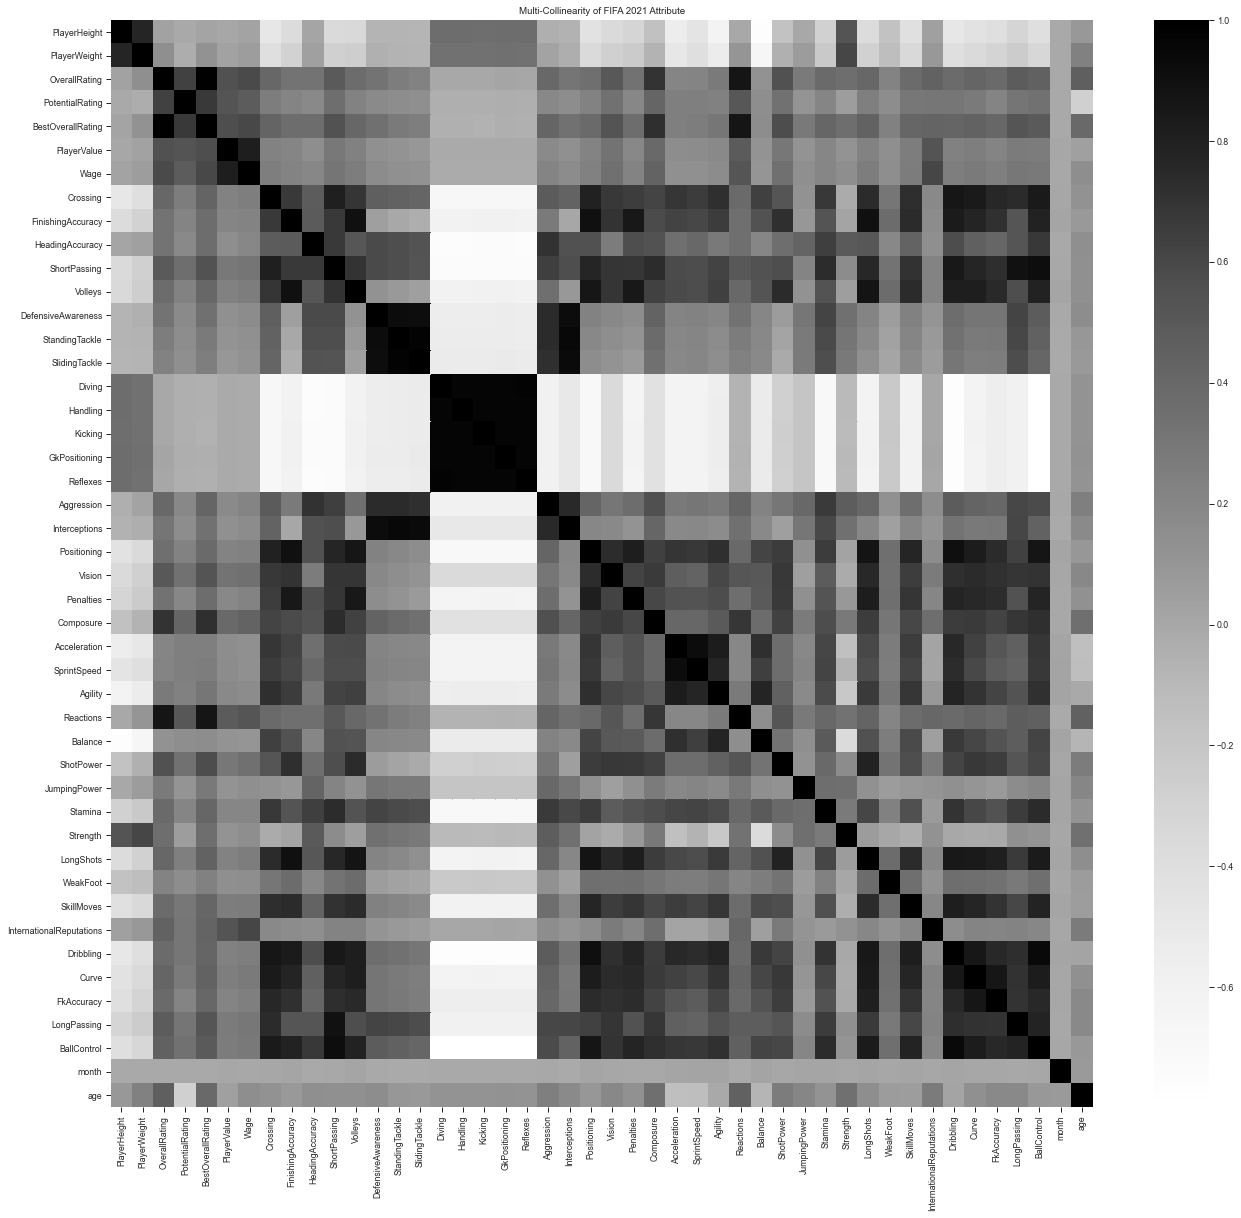

In [154]:
fig, ax = plt.subplots(figsize=(22,20))
sns.set_context('paper')
corr = data_fifa.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='Greys')
ax.set_title('Multi-Collinearity of FIFA 2021 Attribute')

(-0.5, 1999.5, 1199.5, -0.5)

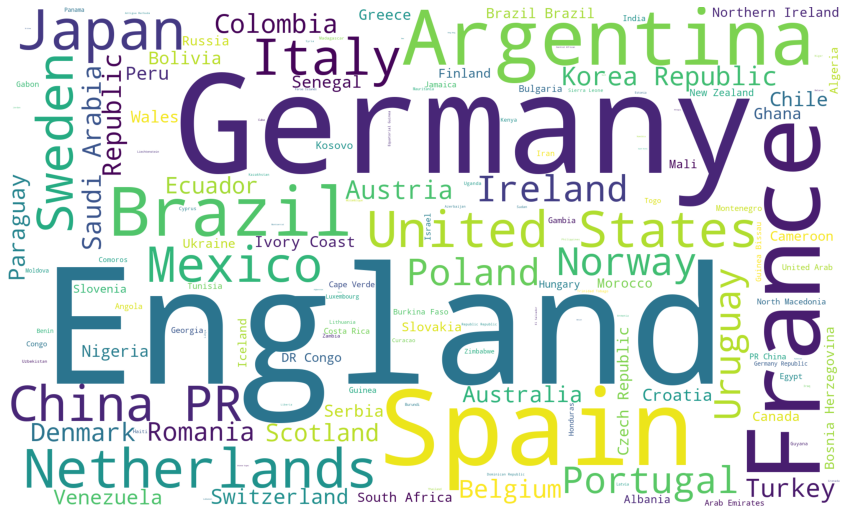

In [175]:
#WordCloud Of Nationality
d_frame = data_fifa.Nationality

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                   background_color='white',
                        width = 2000,
                        height = 1200
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')

In [176]:
data_fifa.groupby("Nationality").PlayerName.count().sort_values(ascending=False).head(10)/100

Nationality
England          17.05
Germany          11.99
Spain            10.63
France           10.02
Argentina         9.32
Brazil            8.94
Japan             4.83
Netherlands       4.46
United States     3.81
Sweden            3.81
Name: PlayerName, dtype: float64

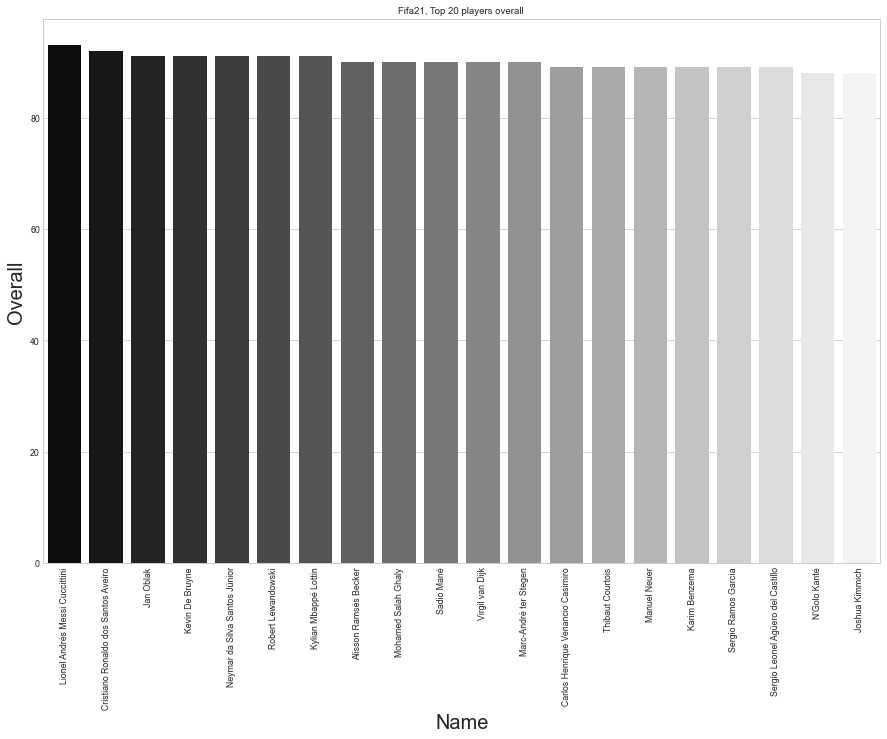

In [178]:
# problem : Top 20 players overall
# We get the names and overals from the data
Overall = data_fifa["BestOverallRating"]
footballer_name = data_fifa["PlayerName"]

# We create dataframe(Name,Overall)
data = pd.DataFrame({'PlayerName': footballer_name,'BestOverallRating':Overall})
"""
data = { example = (messi : 94) }
"""
x = data.PlayerName.head(20)  # comes in order from large to small
y = data.BestOverallRating.head(20)

# visualize
plt.figure(figsize=(15,10))
"""
cubehelix_palette = This produces a colormap with linearly-decreasing (or increasing) brightness.
(sets according to the number of data)
"""
ax= sns.barplot(x=x, y=y,palette ='gray') # x = Name, y = Overall
plt.xticks(rotation= 90)
plt.xlabel('Name', size = 20) # x-axis name
plt.ylabel('Overall', size = 20 ) # y-axis name
plt.title('Fifa21, Top 20 players overall ') # title
plt.show()





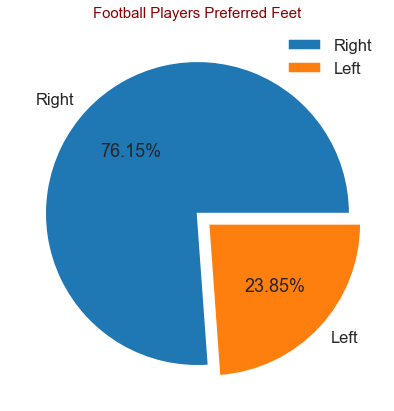

In [186]:
# Which foot does the footballers in fifa 21 use more?
preferred_foot_labels = data_fifa["PreferredFoot"].value_counts().index # (Right,Left) 
preferred_foot_values = data_fifa["PreferredFoot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

# Visualize
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

Text(0.5, 0, 'Total wages')

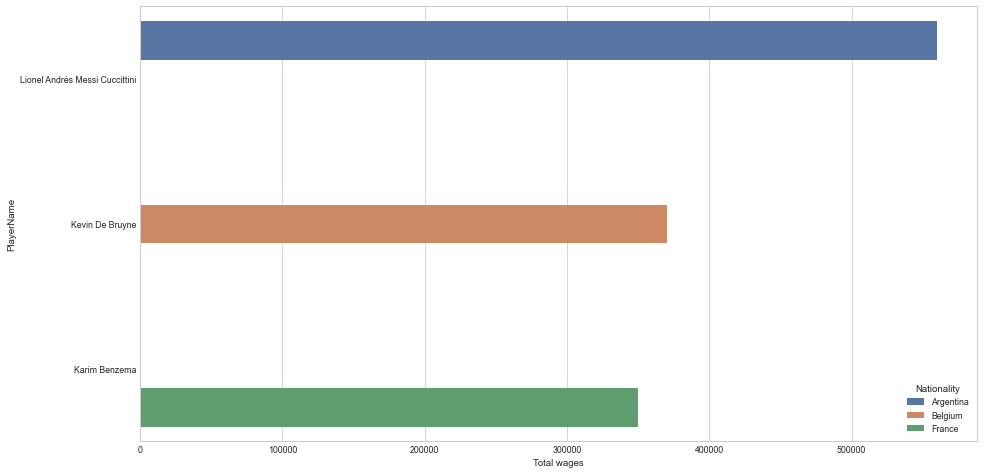

In [181]:
#Players with the highest wages
plt.figure(figsize=(15,8))
player_name = data_fifa.nlargest(3, ['Wage']).set_index('PlayerName')
sns.barplot(player_name['Wage'], player_name.index, ci = None, hue = player_name['Nationality'],palette="deep")
plt.xlabel('Total wages')

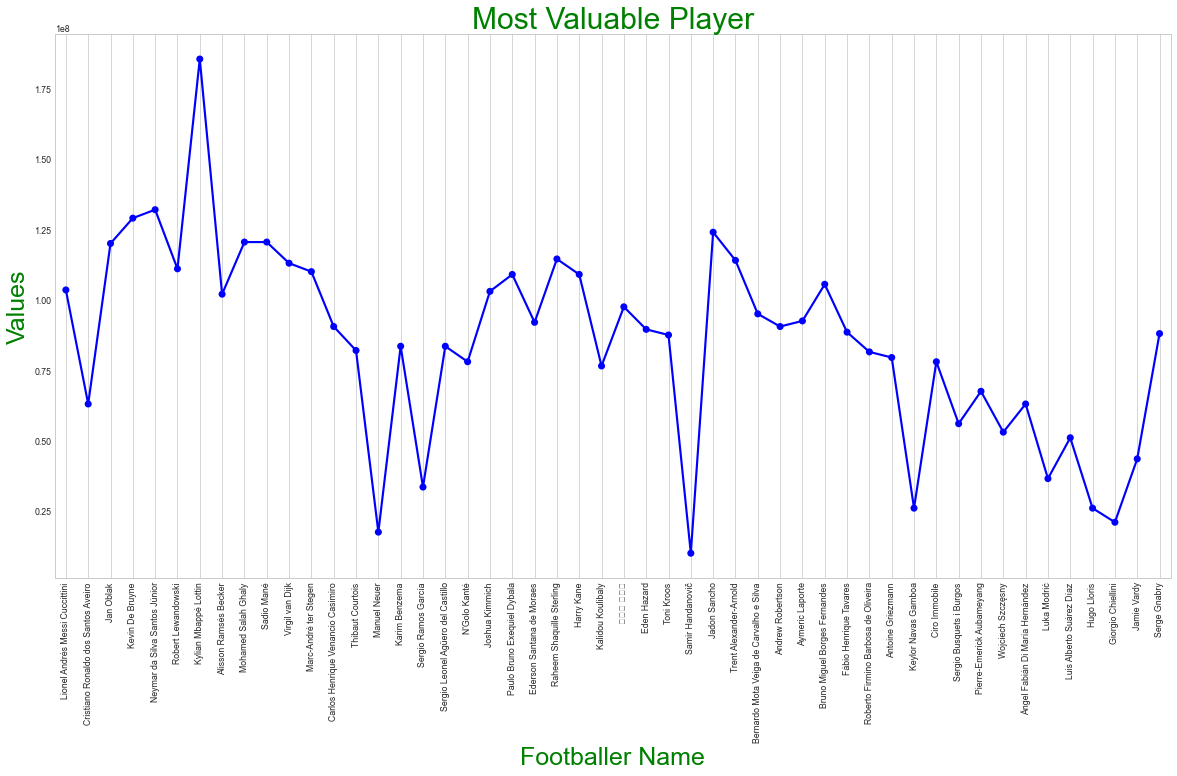

In [183]:
# the football player vision affect the value of the player ?(for 30 players)
vision = data_fifa["Vision"]
"""
we need numerical values to draw the chart
object to float :
value = object(€275K) to float(275) 
takeout(€,M,K)
"""
value = list(data_fifa["PlayerValue"]) 
#value = [float(each.replace('€','').replace('M','').replace('K','')) for each in value]    
name = data_fifa["PlayerName"]

data = pd.DataFrame({'Vision': vision, 'PlayerValue' : value,'PlayerName':name})

x = data.PlayerName.head(50)
value_y = data.PlayerValue.head(50) # value_y = footballer value(30 players)
#vision_y = data.int_vision.head(30) # vision_y = footballer vision (30 players)


# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=x,y=value_y,color='blue',alpha=0.9) # alpha = transparency(0) or opacity(1)
#sns.pointplot(x=x,y=vision_y,color='red',alpha=0.9) # x = x-axis, y = y-axis
#plt.text(20,100,'- Footballer Value',color='black',fontsize = 25,style = 'italic') # write on the graphic
#plt.text(20,105,'- Footballer Vision',color='red',fontsize = 25,style = 'italic')
plt.xticks(rotation= 90) # Position of text on the x-axis
plt.xlabel('Footballer Name',fontsize = 25,color='green') # x-axis name
plt.ylabel('Values',fontsize = 25,color='green') # y-axis name
plt.title('Most Valuable Player',fontsize = 30,color='green') # title
plt.grid()

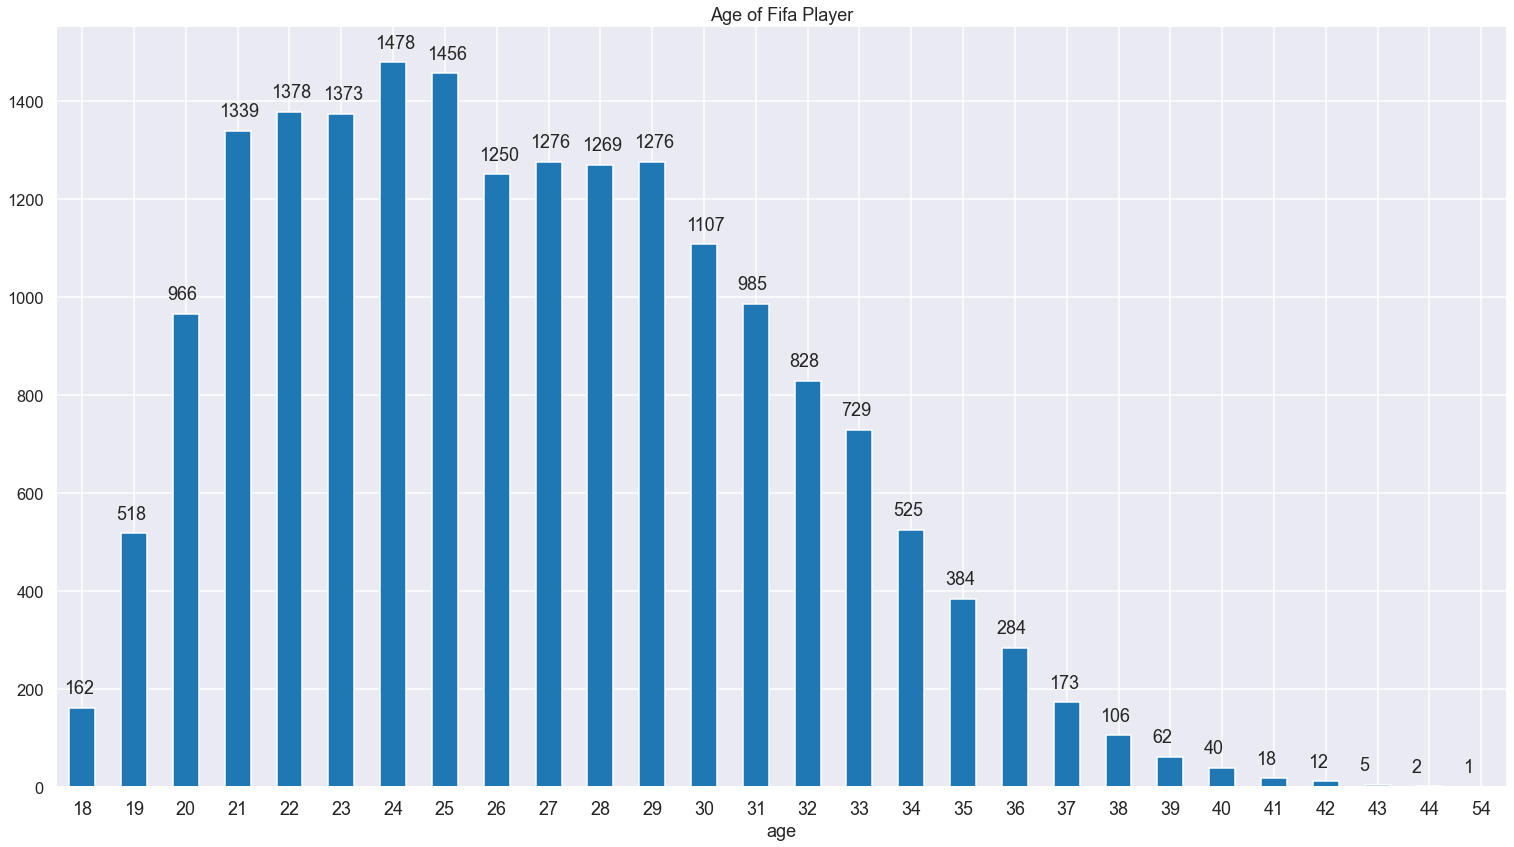

In [185]:
#Fifa 21 Player's Age
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(26,14))
ax = data_fifa.groupby('age')['PlayerName'].count().plot.bar()
plt.title('Age of Fifa Player')
plt.xticks(fontsize = 18,rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

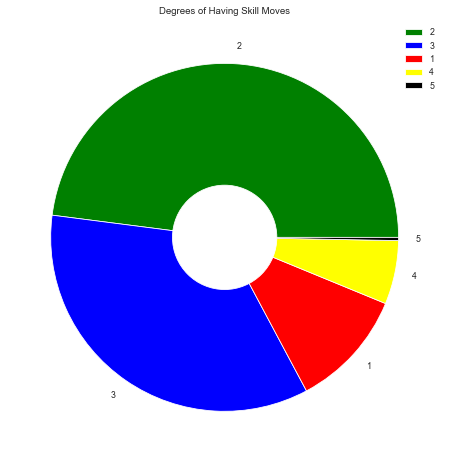

In [188]:
# distribution of skill moves
"""
1.0 = Min
2.0 = 25%
3.0 = 50%
4.0 = 75%
5.0 = Max
"""

sns.set_context('paper')
skill_moves_labels = data_fifa["SkillMoves"].value_counts().index #(1.0,2.0,3.0,4.0,5.0)
skill_moves_values = data_fifa["SkillMoves"].value_counts().values # values
colors = ['green','blue','red','yellow','black']

# visualize
# create a circle for the center of plot
plt.figure(figsize = (8,8))
circle = plt.Circle((0,0),0.3,color = "white") # we create a hole in the middle 
plt.pie(skill_moves_values, labels = skill_moves_labels, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) # we add the hole to the chart
plt.title("Degrees of Having Skill Moves")
plt.legend()
plt.show()

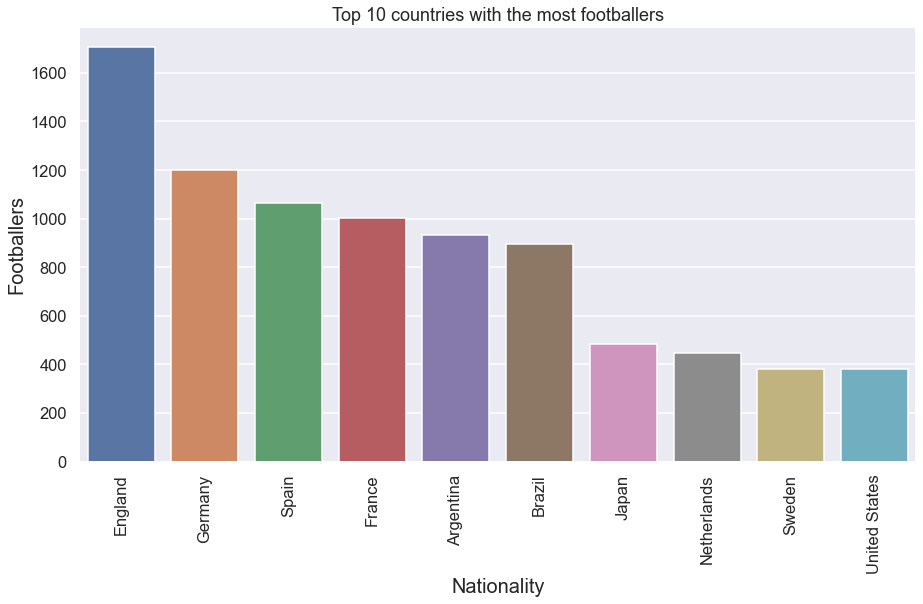

In [194]:
# problem : countries(10) with the most footballers
# Counter is a counter tool.Which country has how many players
newData = Counter(data_fifa["Nationality"])
# top 10 countries with most
most_countries = newData.most_common(10)
sns.set_context('talk')

x,y = zip(*most_countries)
x,y = list(x),list(y)

# visualize
plt.figure(figsize=(15,8))
plt.xticks(rotation= 90)#for making the text in x axis rotate to 90 degree so text wont overlap, It is good for easier understanding and 
#clarification of our graph by anyone
ax= sns.barplot(x=x, y=y, palette='deep') # x = Nationality, y = Footballers
plt.xlabel('Nationality', size = 20) # x-axis name
plt.ylabel('Footballers', size = 20 ) # y-axis name 
plt.title('Top 10 countries with the most footballers') # title
plt.show()